# Extra credit (10 pts)
Design and implement a gradient approach to determine the first and second dimension of the PCA
transformation (compute derivatives). Suggestion minimize the Lagrange function

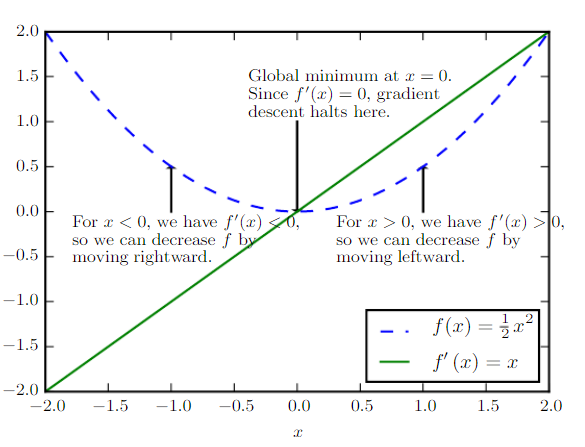


In [104]:
import pandas as pd
import numpy as np 
from sklearn import datasets
import matplotlib.pyplot  as plt
import seaborn as sns

In [105]:
iris = datasets.load_iris()

In [106]:
# gradient decent approach - minimize lagrange function 
# encoding function -- c=D^Tx
X = iris.data
X -= np.mean(X, axis = 0)
y = iris.target

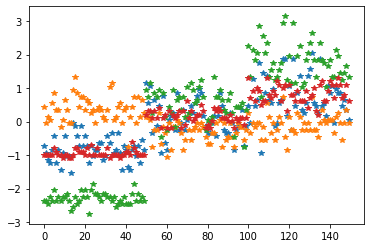

In [107]:
plt.plot(X, '*')
plt.show() # pretty

In [108]:
# who is worth the most?
eigVals, eigVecs = np.linalg.eig(X.T.dot(X))
eigVals # we will keep the first two features 

# respect to one:
print(eigVecs[:,0].dot(eigVecs[:,0].T))
print(eigVecs[:,1].dot(eigVecs[:,1].T))

0.9999999999999999
1.0


In [163]:
# reconstruction function -- r(x)=g(f(x))=DD^Tx --PC1 dd^T
X_new = eigVecs.T.dot(X.T)
cov_matrix_01  = np.cov(X_new[0])

In [164]:
cov_matrix_01

array(1.32069611)

In [145]:
# i need to be able to pass a matrix into this 
# passing a matrix in to it then needs to find the lowest slope = 0

def decent(matrix, iterations):
  max_iters = iterations # maximum number of iterations
  data = matrix
  rate = 0.01 # Learning rate
  precision = 0.000001 #This tells us when to stop the algorithm
  prev_slope = 1
  iters = 0 #iteration counter
  df = lambda x: 2*(x+5) #Gradient of our function 
  d_size = X_new.shape[1] # first feature size
  d_new = np.random.rand(d_size) # random fector creation
  for i in range(max_iters):
    prev_x = d_new #Store current x value in prev_x
    d_new = d.T.dot(d) # dd^T
    d_new = d_new - rate * df(prev_x) #Grad descent
    prev_slope = abs(d_new - prev_x) #Change in x
    iters = iters+1 #iteration count
    lambda_ev = np.dot(np.transpose(d_new), data.dot(d_new))

  return lambda_ev

In [151]:
PC1_val = decent(cov_matrix_01, 10000)

In [162]:
pc1 = X.dot(PC1_val.T)

p1 =  pc1.tolist()
print(p1)
plt.figure()
sns.scatterplot(pc1, [0] * 150, hue=y)

[[-1193782.0198596846, 710915.9293155402, -3786912.111429327, -1604914.1235602372], [-1514978.9758757413, -92076.46072460453, -3786912.111429327, -1604914.1235602372], [-1836175.9318917994, 229120.49529145367, -3947510.589437356, -1604914.1235602372], [-1996774.4098998294, 68522.01728342456, -3626313.633421298, -1604914.1235602372], [-1354380.497867713, 871514.4073235694, -3786912.111429327, -1604914.1235602372], [-711986.5858355965, 1353309.841347656, -3305116.67740524, -1283717.1675441791], [-1996774.4098998294, 550317.4513075112, -3786912.111429327, -1444315.6455522082], [-1354380.497867713, 550317.4513075112, -3626313.633421298, -1604914.1235602372], [-2317971.365915886, -252674.93873263363, -3786912.111429327, -1604914.1235602372], [-1514978.9758757413, 68522.01728342456, -3626313.633421298, -1765512.601568266], [-711986.5858355965, 1032112.8853315985, -3626313.633421298, -1604914.1235602372], [-1675577.453883771, 550317.4513075112, -3465715.155413269, -1604914.1235602372], [-1675

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Exception: ignored

<Figure size 432x288 with 0 Axes>